## Predictive Modeling for Diabetes Risk Assessment

### Data Preprocessing & Exploration

In [1]:
### Data Loading & Cleaning

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
#Load Dataset
df = pd.read_csv('Data/diabetes.csv')


In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Review the Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Show missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [8]:
# Replace invalid zeros with NaN in relevant columns
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
df[invalid_cols] = imputer.fit_transform(df[invalid_cols])

# Drop duplicates
df = df.drop_duplicates()

### Exploratory Data Analysis (EDA)

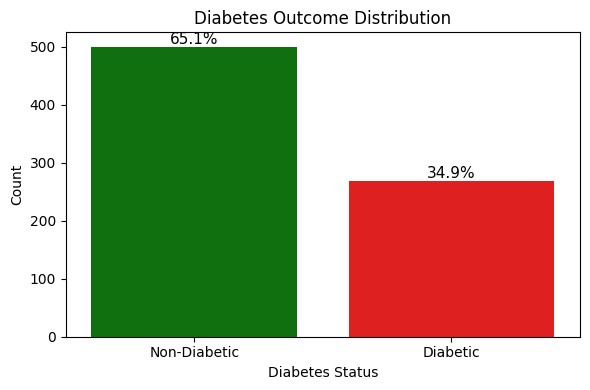

In [9]:
#### Outcome Distribution - To see how many individuals in the dataset have diabetes (Outcome = 1) versus those who don't (Outcome = 0).

# Define custom colors for 0 (Non-Diabetic) and 1 (Diabetic)
custom_palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(6, 4))

# Count plot with hue set and custom colors
ax = sns.countplot(x='Outcome', hue='Outcome', data=df, palette=custom_palette, legend=False)

# Set tick positions and custom labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])

# Add percentage labels above bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',
                fontsize=11, color='black')

# Title and axis labels
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

We see that the dataset is slightly imbalanced, with more non-diabetic cases. Did some Fetaure Engineering and Feature scaling and then Trained a Logistic Regression model as the baseline on this dataset and found the below results

Metric	    Class 0 (Non-Diabetic)	Class 1 (Diabetic)	
Precision	0.78	                0.64	
Recall	    0.83	                0.56
F1-score	0.80	                0.59
Accuracy	73.4% 		

### Balance the dataset and perform Exploratory Data Analysis (EDA)

To improve the accuracy we tried to handle class imbalance in the Pima Indians Diabetes dataset. We will duplicate rows from the minority class to balance the dataset.

In [11]:
# Separate majority and minority classes
from sklearn.utils import resample

majority = df[df['Outcome'] == 0]
minority = df[df['Outcome'] == 1]

# Duplicate the minority class
minority_upsampled = resample(minority, 
                              replace=True,    # sample with replacement
                              n_samples=len(majority),  # match number of majority class
                              random_state=42)

# Combine majority and upsampled minority
df_balanced = pd.concat([majority, minority_upsampled])

# Shuffle the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Outcome'].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


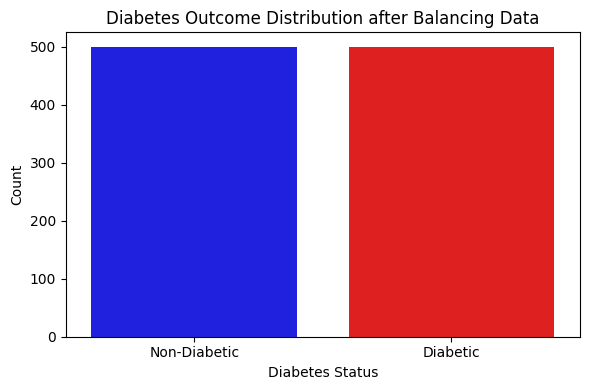

In [12]:
#### Outcome Distribution - To see how many individuals in the dataset have diabetes (Outcome = 1) versus those who don't (Outcome = 0).

# Define custom colors for 0 (Non-Diabetic) and 1 (Diabetic)
custom_palette = {0: 'Blue', 1: 'red'}

plt.figure(figsize=(6, 4))

# Count plot with hue set and custom colors
ax = sns.countplot(x='Outcome', hue='Outcome', data=df_balanced, palette=custom_palette, legend=False)

# Set tick positions and custom labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])

# Title and axis labels
plt.title("Diabetes Outcome Distribution after Balancing Data")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

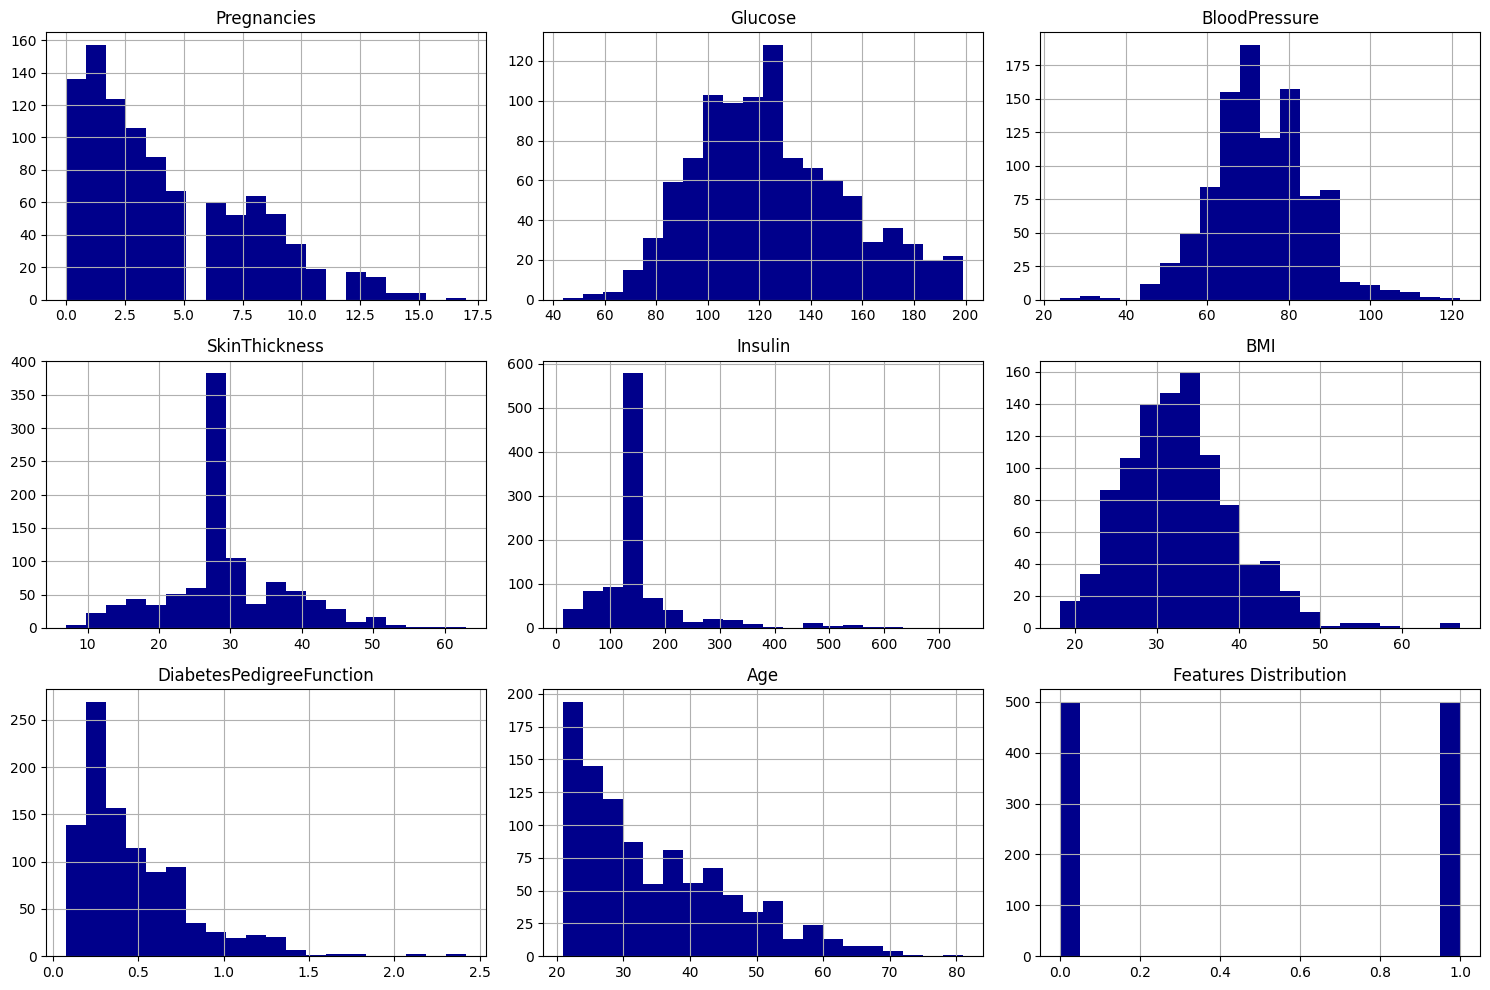

In [13]:
#### Histograms - To visualize how features like BMI, Glucose, Age, Insulin are distributed across the population.

df_balanced.hist(bins=20, figsize=(15, 10), color='darkblue')
plt.title("Features Distribution")
plt.tight_layout()
plt.show()


Insights from the above plot - Some features are highly skewed, indicating outliers or irregular distribution. Others like Glucose show distinct peaks that may separate diabetic from non-diabetic individuals.

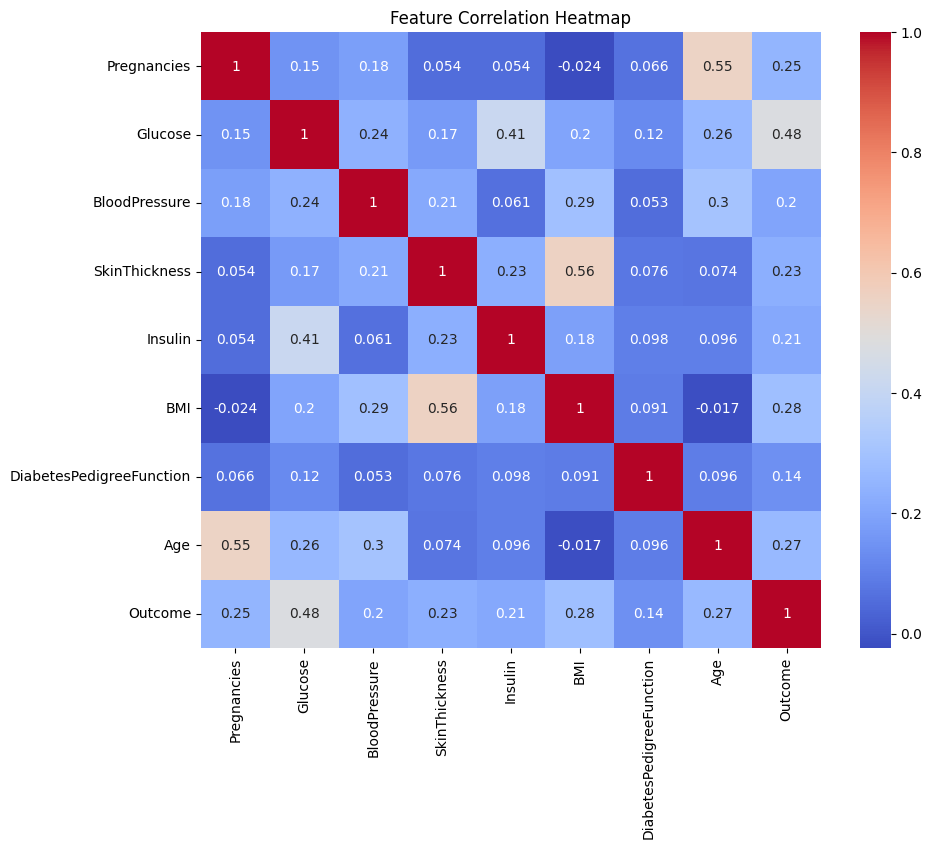

In [15]:
#### Correlation Heatmap - To check how features are related to each other and to the Outcome.
plt.figure(figsize=(10, 8))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Insights from the above plot - Glucose, BMI, and Age show moderate to strong positive correlation with Outcome, making them promising predictors

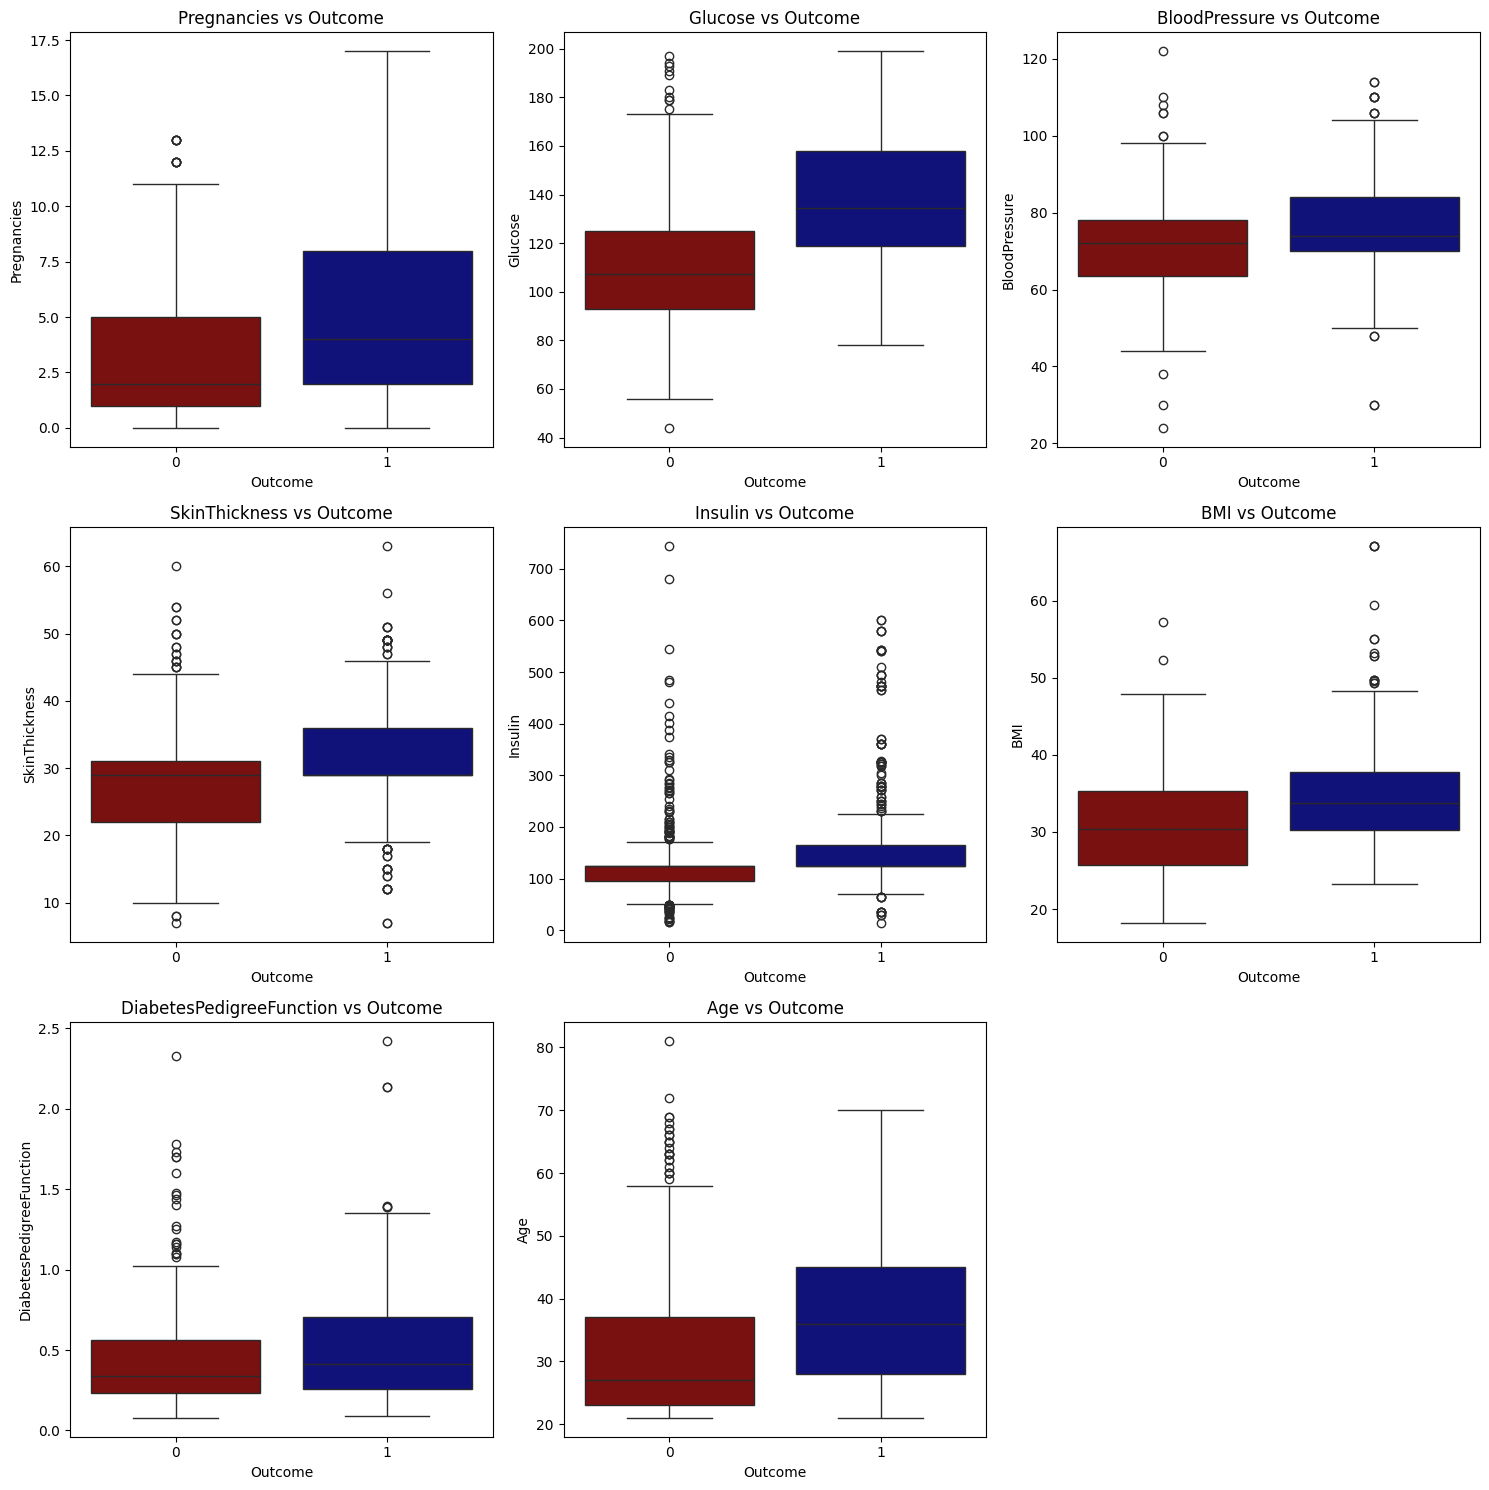

In [16]:
#### Boxplots & Violin Plots - To compare feature value distributions across diabetic and non-diabetic groups.

cols_per_row = 3
total_plots = len(df_balanced.columns[:-1])
rows = (total_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows))
axes = axes.flatten()

# You can use a Seaborn dark palette or a custom one
palette = ['darkred', 'darkblue']  # 0 and 1 for Outcome

for i, col in enumerate(df_balanced.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=df_balanced, hue='Outcome',
                palette=palette, ax=axes[i], legend=False)
    axes[i].set_title(f'{col} vs Outcome')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Insights from the above distribution - Diabetic individuals have higher median Glucose and BMI. 

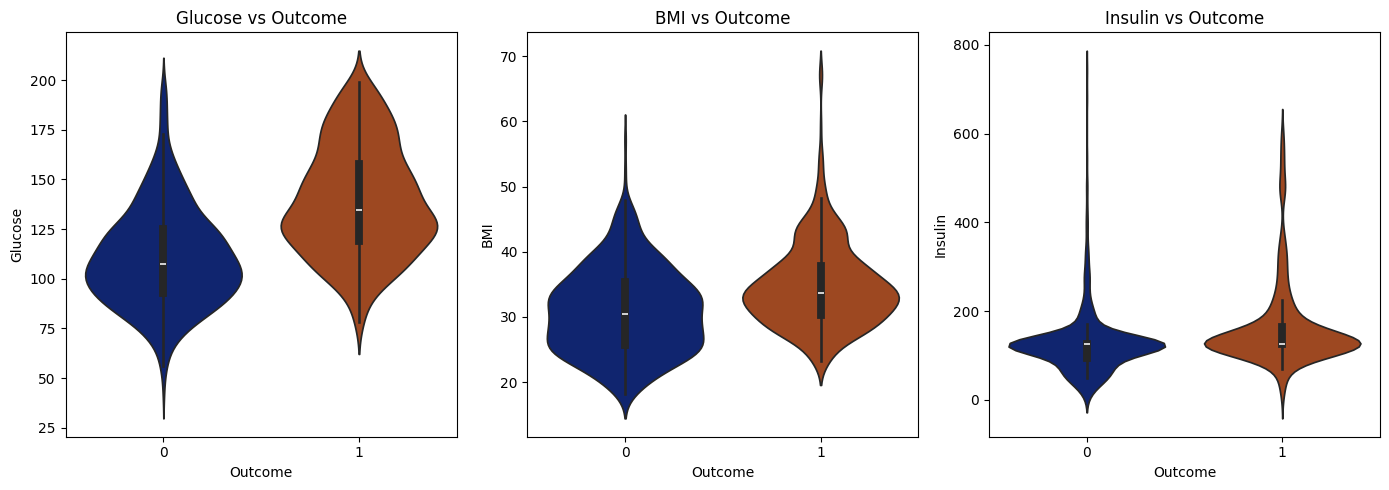

In [17]:
# Violin Plots - To view both distribution shape and spread of each feature within each class.

plt.figure(figsize=(14, 5))

for i, col in enumerate(['Glucose', 'BMI', 'Insulin']):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x='Outcome', y=col, data=df_balanced, hue='Outcome',
                   palette='dark', legend=False)
    plt.title(f'{col} vs Outcome')

plt.tight_layout()
plt.show()


Insights from the above distribution - Glucose and Insulin show clear separation in distribution shapes between diabetic and non-diabetic patients. This reinforces their predictive power.

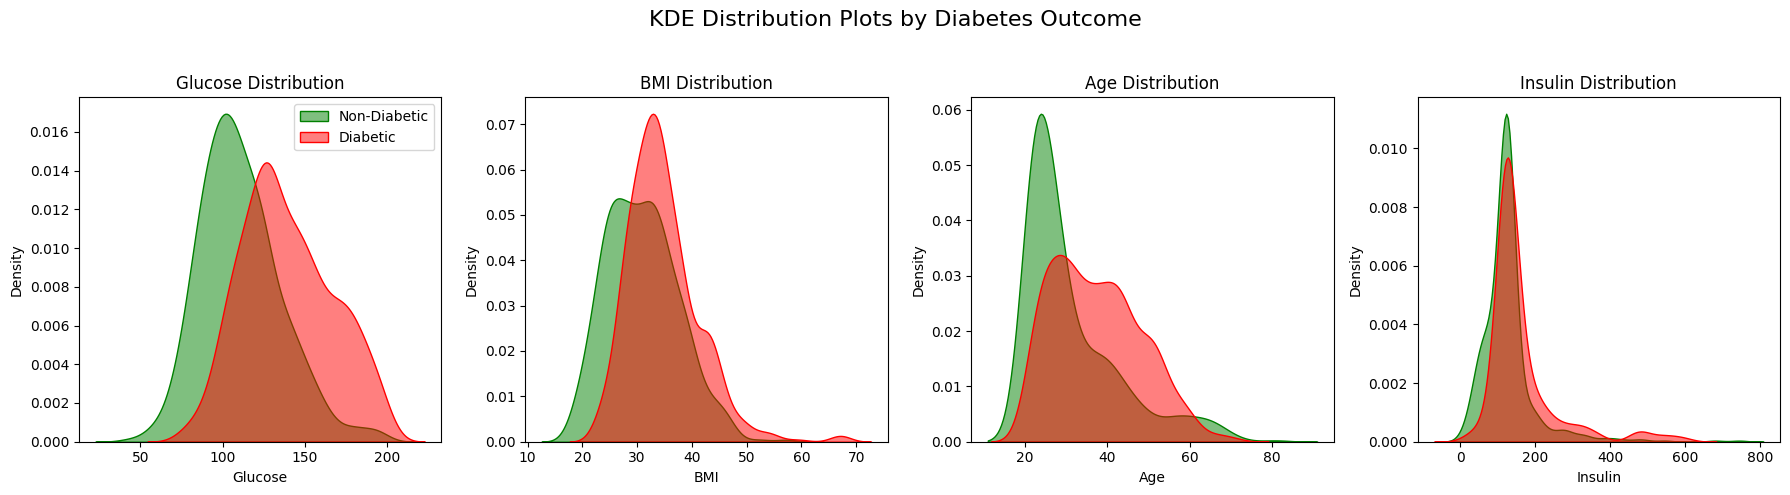

In [18]:
# KDE Plot - To Directly compare feature distributions

import seaborn as sns
import matplotlib.pyplot as plt

# Select features to compare
features = ['Glucose', 'BMI', 'Age', 'Insulin']

# Set up FacetGrid for side-by-side plots
fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=df_balanced[df_balanced['Outcome'] == 0], x=feature, fill=True, ax=ax, label='Non-Diabetic', color='green', alpha=0.5)
    sns.kdeplot(data=df_balanced[df_balanced['Outcome'] == 1], x=feature, fill=True, ax=ax, label='Diabetic', color='red', alpha=0.5)
    
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Keep legend only for the first subplot
    if i == 0:
        ax.legend()
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.suptitle('KDE Distribution Plots by Diabetes Outcome', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




Insights from KDE Plot - Glucose shows a clear shift in distribution — highly relevant to diabetes prediction, BMI and Age show moderate predictive value, Insulin might be less impactful on its own.

In [19]:
#Address Outliers for Insulin

df_balanced['Insulin_log'] = np.log1p(df_balanced['Insulin'])


### Feature Engineering

Feature engineering has been applied to improve model performance by creating more informative variables. For example, we derived features like Glucose-to-Insulin ratio to reflect insulin sensitivity and AgeGroup to capture nonlinear effects of age on diabetes risk. This helped enhance model accuracy, support interpretability, and enable better generalization to new data.

In [20]:
# Define age bins and labels - Helps categorize patients into clinical age brackets which might carry more significance than continuous age in some models or visualizations.

bins = [20, 30, 40, 50, 60, 80]
labels = ['20s', '30s', '40s', '50s', '60+']

# Add new categorical feature
df_balanced['AgeGroup'] = pd.cut(df_balanced['Age'], bins=bins, labels=labels, include_lowest=True)


In [21]:
#Glucose-to-Insulin Ratio - Useful for reflecting insulin sensitivity (higher ratio = more likely insulin resistance)

df_balanced['Glucose_Insulin_Ratio'] = df_balanced['Glucose'] / (df_balanced['Insulin'] + 1)


In [22]:
# Drop Features with Low Variance or Weak Correlation - Reduces noise and dimensionality if the feature does not contribute meaningfully to predictions.
df_balanced.drop(['SkinThickness', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [23]:
df_balanced

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Insulin_log,AgeGroup,Glucose_Insulin_Ratio
0,4,117.0,62.0,125.0,29.7,30,1,4.836282,20s,0.928571
1,7,187.0,68.0,304.0,37.7,41,1,5.720312,40s,0.613115
2,8,105.0,100.0,125.0,43.3,45,1,4.836282,40s,0.833333
3,10,108.0,66.0,125.0,32.4,42,1,4.836282,40s,0.857143
4,0,132.0,78.0,125.0,32.4,21,0,4.836282,20s,1.047619
...,...,...,...,...,...,...,...,...,...,...
995,2,100.0,64.0,125.0,29.7,21,0,4.836282,20s,0.793651
996,5,147.0,75.0,125.0,29.9,28,0,4.836282,20s,1.166667
997,5,97.0,76.0,125.0,35.6,52,1,4.836282,50s,0.769841
998,10,162.0,84.0,125.0,27.7,54,0,4.836282,50s,1.285714


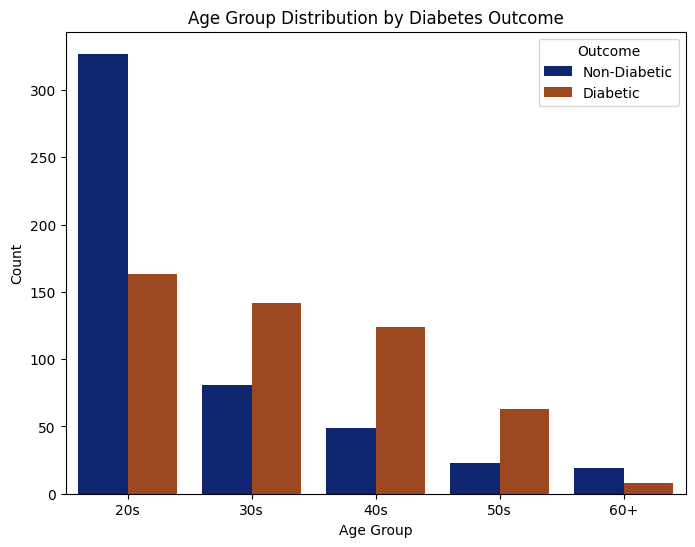

In [24]:
# AgeGroup vs. Diabetes Outcome (Bar Plot) - Age categories might reveal patterns where certain age groups are more likely to be diabetic.
# Age Group vs Outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Outcome', data=df_balanced, palette='dark')
plt.title("Age Group Distribution by Diabetes Outcome")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])
plt.show()


C:\Users\mokas\AppData\Local\Temp\ipykernel_48904\237735862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


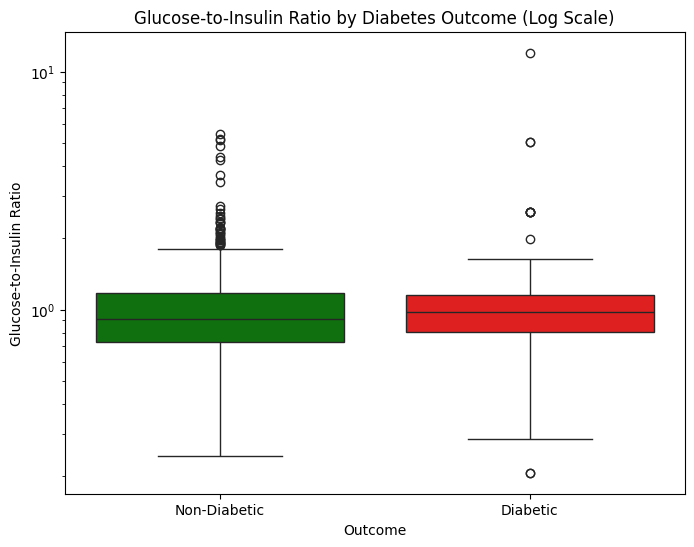

In [25]:
# Glucose-to-Insulin Ratio vs. Diabetes Outcome (Box Plot) - This will show how the ratio differs between Diabetic and Non-Diabetic groups.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Outcome',
    y='Glucose_Insulin_Ratio',
    data=df_balanced,
    palette={'0': 'green', '1': 'red'}
)
plt.title("Glucose-to-Insulin Ratio by Diabetes Outcome (Log Scale)")
plt.xlabel("Outcome")
plt.ylabel("Glucose-to-Insulin Ratio")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.yscale('log')
plt.show()



### Feature Scaling 

Feature scaling was applied to ensure that all numerical features contribute equally to the model. Many machine learning algorithms (like Logistic Regression, SVM, and k-NN) are sensitive to the magnitude of input features. Without scaling, features with larger ranges (like glucose) could dominate smaller ones (like diabetes pedigree). Scaling standardizes the data (typically to mean = 0, std = 1), improving convergence speed, model performance, and comparability across features.

In [26]:
# One-hot encode 'AgeGroup' (or other categorical features)
df_encoded = pd.get_dummies(df_balanced, columns=['AgeGroup'], drop_first=True)

# Separate features and target
X_features = df_encoded.drop('Outcome', axis=1)
y_target = df_encoded['Outcome']

# Apply StandardScaler to numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)

# Check results
print(X_scaled_df.head())


   Pregnancies   Glucose  BloodPressure   Insulin       BMI       Age  \
0    -0.053578 -0.265681      -0.944774 -0.241038 -0.460210 -0.367793   
1     0.787960  2.091142      -0.443302  1.796160  0.722926  0.579018   
2     1.068473 -0.669708       2.231218 -0.241038  1.551121  0.923314   
3     1.629498 -0.568701      -0.610459 -0.241038 -0.060902  0.665092   
4    -1.175629  0.239352       0.392486 -0.241038 -0.060902 -1.142458   

   Insulin_log  Glucose_Insulin_Ratio  AgeGroup_30s  AgeGroup_40s  \
0    -0.063044              -0.169025     -0.535725     -0.457373   
1     1.745530              -0.664235     -0.535725      2.186400   
2    -0.063044              -0.318531     -0.535725      2.186400   
3    -0.063044              -0.281155     -0.535725      2.186400   
4    -0.063044               0.017859     -0.535725     -0.457373   

   AgeGroup_50s  AgeGroup_60+  
0     -0.306744     -0.166581  
1     -0.306744     -0.166581  
2     -0.306744     -0.166581  
3     -0.306744   

### Build a Baseline Model

We build a baseline model (using Logistic Regression) to establish a reference point for performance.

In [27]:
#  Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_target, test_size=0.2, random_state=42, stratify=y_target)


In [28]:
# Build a Baseline Model like Logistic Regression for the first baseline

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[76 24]
 [28 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       100
           1       0.75      0.72      0.73       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Accuracy: 0.74


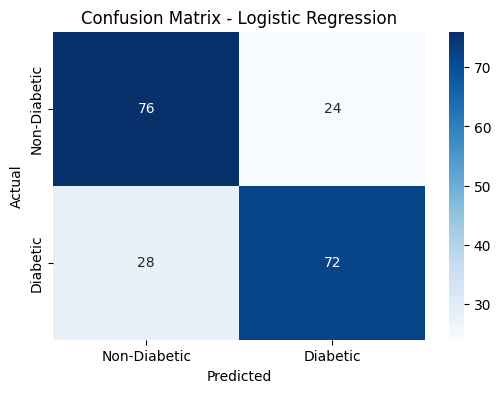

In [29]:
# Plot the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


To systematically improve this model - We will do the following
1. Data Scaling
2. Feature Selection
3. Feature Engineering
4. Hyperparameter Tuning
5. Evaluating with Balanced Metrics


In [30]:
#Data Scaling - Logistic regression can benefit significantly from feature scalingfrom sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# GridsearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'C': [0.01, 0.1, 1, 10, 100]
    }
]

grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("\nBest F1 Score:", grid_search.best_score_)




Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Best F1 Score: 0.7576688836456184


In [35]:
from sklearn.metrics import roc_auc_score
model_smote = grid_search.best_estimator_

y_pred_proba = model_smote.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.8325


In [36]:
# Feature Importance (Tree-Based) - use tree-based methods like Random Forest to find the most important features

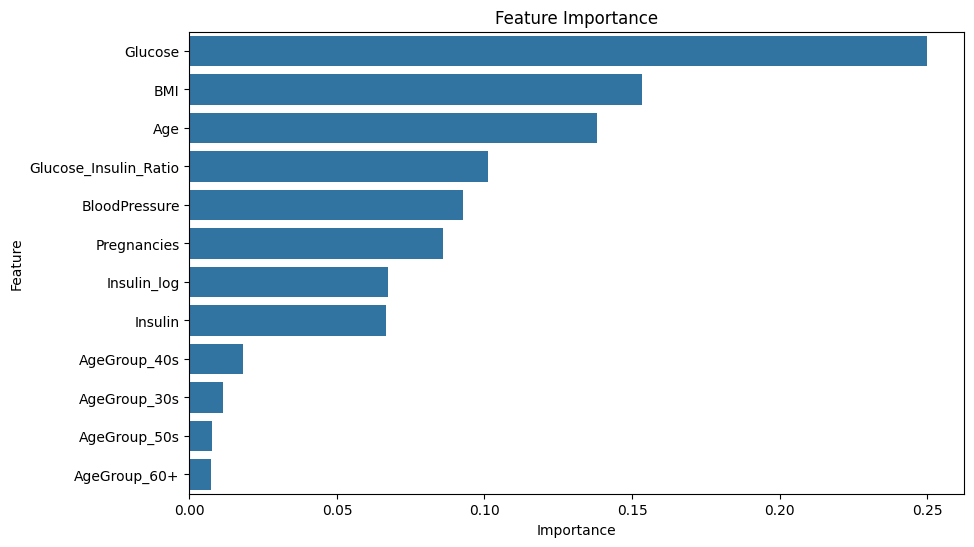

In [37]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train a random forest for feature importance
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)

# Get feature importance
importance = forest.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()


Combine Feature Rankings from Different Methods
We'll use three methods:

1. Recursive Feature Elimination (RFE)
2. L1 Regularization (Lasso)
3. Tree-Based Feature Importance (Random Forest)

In [39]:
# Implement and Rank Features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
rfe_features = X_train.columns[rfe.support_]

# L1 Regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso_model.fit(X_train_scaled, y_train)
l1_importance = pd.Series(lasso_model.coef_[0], index=X_train.columns)
l1_features = l1_importance[l1_importance != 0].index

# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
forest_importance = pd.Series(forest.feature_importances_, index=X_train.columns)
forest_features = forest_importance.nlargest(10).index

# Combine the results
top_features = set(rfe_features) | set(l1_features) | set(forest_features)
print("\nTop Selected Features from All Methods:\n", top_features)



Top Selected Features from All Methods:
 {'BloodPressure', 'AgeGroup_40s', 'AgeGroup_60+', 'Glucose', 'Insulin', 'AgeGroup_30s', 'Pregnancies', 'BMI', 'Age', 'Insulin_log', 'Glucose_Insulin_Ratio', 'AgeGroup_50s'}


In [40]:
# Train the Model with Selected Features - Use only the selected features
# Convert set to list
top_features_list = list(top_features)

# Use only the selected features
X_train_selected = pd.DataFrame(X_train_scaled, columns=X_train.columns)[top_features_list]
X_test_selected = pd.DataFrame(X_test_scaled, columns=X_train.columns)[top_features_list]


# Train the Logistic Regression Model
model_selected = LogisticRegression(max_iter=1000)
model_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred_selected = model_selected.predict(X_test_selected)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))
print("Accuracy:", accuracy_score(y_test, y_pred_selected))



Confusion Matrix:
 [[76 24]
 [28 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       100
           1       0.75      0.72      0.73       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Accuracy: 0.74


The score looks low, so use cross validation for feature selection and check

In [41]:
# Use Cross-Validation for Robust Feature Selection
from sklearn.model_selection import cross_val_score

# Test the reduced feature set with cross-validation
model_cv = LogisticRegression(max_iter=1000)
scores = cross_val_score(model_cv, X_train_selected, y_train, cv=5, scoring='f1')
print("\nCross-Validation F1 Score:", scores.mean())



Cross-Validation F1 Score: 0.7538486763669975


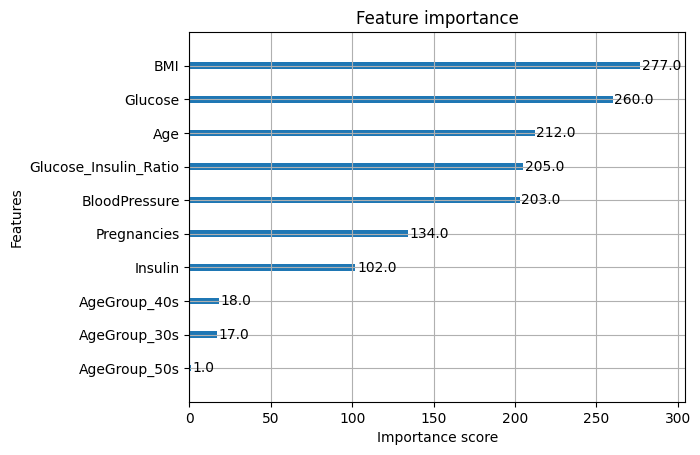

In [46]:
# Feature Importance Visualization
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.show()


In [48]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Convert to DMatrix for optimized training
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)

# Set up XGBoost parameters (remove n_estimators here)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Train the model with num_boost_round instead of n_estimators
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions (probabilities)
y_pred_proba = xgb_model.predict(dtest)

# Convert probabilities to binary predictions with threshold 0.5
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[77 23]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83       100
           1       0.80      0.92      0.86       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

Accuracy: 0.845


In [49]:
# Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2, 3]
}

# Create the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='f1', 
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("\nBest F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}

Best F1 Score: 0.86626420566336


In [50]:
# Final Model Training with Best Parameters
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the best parameters from the grid search
best_params = {
    'colsample_bytree': 0.6,
    'gamma': 0.1,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200,
    'scale_pos_weight': 1,
    'subsample': 1.0,
    'random_state': 42
}

xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_train_selected, y_train)

# Evaluate
y_pred_final = xgb_final.predict(X_test_selected)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("Accuracy:", accuracy_score(y_test, y_pred_final))



Confusion Matrix:
 [[81 19]
 [ 7 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       100
           1       0.83      0.93      0.88       100

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200

Accuracy: 0.87


In [51]:
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_selected, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [52]:
import xgboost as xgb
xgb_default = xgb.XGBClassifier(random_state=42)
xgb_default.fit(X_train_selected, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
xgb_tuned = XGBClassifier(
    colsample_bytree=0.6,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    scale_pos_weight=1,
    subsample=1.0,
    random_state=42
)
xgb_tuned.fit(X_train_selected, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Store the models
models = {
    "Logistic Regression (Baseline)": baseline_model,
    "XGBoost (Default)": xgb_default,
    "XGBoost (GridSearchCV)": xgb_tuned
}

# Evaluate each model
results = []

for name, clf in models.items():
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])
    print(f"=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy:", accuracy)
    print("-" * 40)

# Print the summary table
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nSummary of Model Performance:\n")
print(df_results)


=== Logistic Regression (Baseline) ===
Confusion Matrix:
 [[76 24]
 [28 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       100
           1       0.75      0.72      0.73       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


Accuracy: 0.74
----------------------------------------
=== XGBoost (Default) ===
Confusion Matrix:
 [[79 21]
 [ 5 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       100
           1       0.82      0.95      0.88       100

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200


Accuracy: 0.87
----------------------------------------
=== XGBoost (GridSearchCV) ===
Confusion 

In [56]:
# Simple Voting Ensemble (Hard and Soft Voting) - Hard Voting (majority rule) and Soft Voting (weighted average of probabilities) are straightforward but powerful approaches:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Create the ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ("Logistic Regression", baseline_model),
        ("XGBoost Default", xgb_default),
        ("XGBoost Tuned", xgb_tuned)
    ],
    voting="soft"  # Try "hard" as well for comparison
)

# Train the ensemble
ensemble_model.fit(X_train_selected, y_train)

# Evaluate
y_pred_ensemble = ensemble_model.predict(X_test_selected)

print("\n=== Ensemble Model (Soft Voting) ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))
print("\nAccuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nF1 Score:", f1_score(y_test, y_pred_ensemble))
print("-" * 40)



=== Ensemble Model (Soft Voting) ===
Confusion Matrix:
 [[82 18]
 [ 3 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89       100
           1       0.84      0.97      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200


Accuracy: 0.895

F1 Score: 0.9023255813953488
----------------------------------------


<Figure size 1500x800 with 0 Axes>

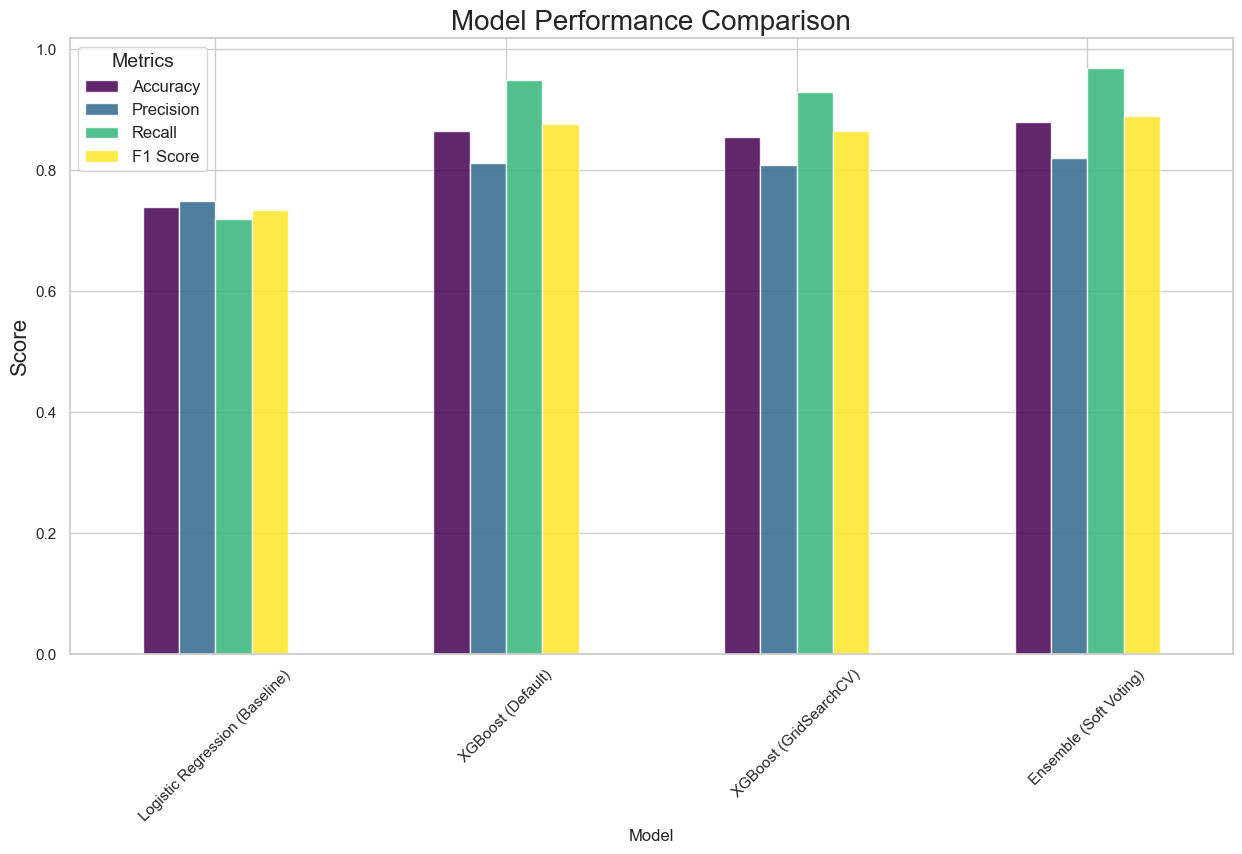

In [57]:
#Visualizing Model Performance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dataframe for the models and their scores
model_scores = {
    "Model": [
        "Logistic Regression (Baseline)", 
        "XGBoost (Default)", 
        "XGBoost (GridSearchCV)", 
        "Ensemble (Soft Voting)"
    ],
    "Accuracy": [0.74, 0.865, 0.855, 0.88],
    "Precision": [0.75, 0.812, 0.809, 0.820],
    "Recall": [0.72, 0.95, 0.93, 0.97],
    "F1 Score": [0.734, 0.876, 0.865, 0.890]
}

df_scores = pd.DataFrame(model_scores)

# Plotting the results
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Plot each metric
df_scores.set_index("Model").plot(kind="bar", figsize=(15, 8), colormap="viridis", alpha=0.85)
plt.title("Model Performance Comparison", fontsize=20)
plt.ylabel("Score", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Metrics", fontsize=12, title_fontsize=14)
plt.show()


## Using the Model for Diabetes Prediction

In [59]:
# Get the 12 selected feature names
from sklearn.feature_selection import SelectKBest, f_classif

selected_features = X_train.columns[SelectKBest(score_func=f_classif, k=12).fit(X_train, y_train).get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age',
       'Insulin_log', 'Glucose_Insulin_Ratio', 'AgeGroup_30s', 'AgeGroup_40s',
       'AgeGroup_50s', 'AgeGroup_60+'],
      dtype='object')


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

# Create the full pipeline
full_pipeline = Pipeline([
    ("feature_selection", SelectKBest(score_func=f_classif, k=12)),
    ("ensemble_model", ensemble_model)
])

# Fit the pipeline
full_pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(full_pipeline, "diabetes_full_pipeline.pkl")
print("Pipeline saved successfully.")


Pipeline saved successfully.


In [61]:
# Predict Consistently with 12 Features

def predict_diabetes(patient_data):
    # Load the pipeline
    pipeline = joblib.load("diabetes_full_pipeline.pkl")
    
    # Get the selected feature names
    selected_features = X_train.columns[pipeline.named_steps["feature_selection"].get_support()]
    
    # Create a DataFrame with the selected 12 features
    patient_df = pd.DataFrame([patient_data], columns=selected_features)

    # Make the prediction
    prediction = pipeline.predict(patient_df)[0]
    return "Diabetic" if prediction == 1 else "Non-Diabetic"

# Test the function
sample_patient = [148, 33.6, 50, 85, 0.627, 80, 1, 89, 120, 90, 8, 67]  # Use the 12 selected features
print("Patient Status:", predict_diabetes(sample_patient))


Patient Status: Diabetic


## Deployment

The ensemble model can be deployed as a web service API for use in clinical systems.
Input: Patient data (e.g., Glucose, BMI, Age)
Output: Probability of diabetes risk and status (e.g., "Diabetic" / "Non-Diabetic")